# The Sparks Foundation
GRIP MARCH,2021

## Task 1 - Prediction using Supervised ML
Predict the percentage of an student based on the no. of study hours.

# Author - Sampurna Lal

In [1]:
#importing libraries
import pandas as pd # library for data analysis
import numpy as np # library to handle data in a vectorized manner
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv") 
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.dtypes #types of the features in the dataset

Hours     float64
Scores      int64
dtype: object

In [5]:
df.info() #used to print a concise summary of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Data visualization

<function matplotlib.pyplot.show(*args, **kw)>

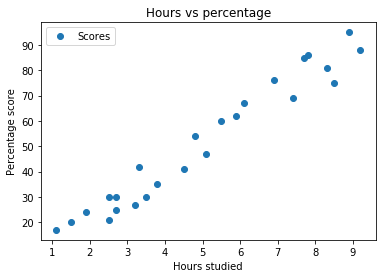

In [6]:
df.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show

In [7]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

### Splitting the Dataset into Train and Test

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

### Training the algorithm
#### Linear Regression
Linear regression is a basic and commonly used type of predictive analysis. It is used when we want to predict the value of a variable based on the value of another variable. The variable we want to predict is called the dependent variable (or sometimes, the outcome variable).

In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

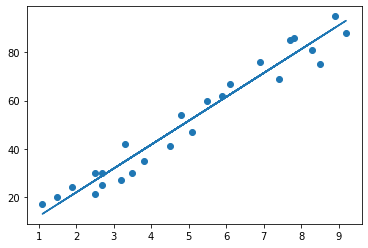

In [11]:
# Plotting the regression line
line = lr.coef_*x+lr.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [12]:
print('Train Score')
print(lr.score(x_train,y_train))

Train Score
0.9515510725211553


In [13]:
print('Test Score')
print(lr.score(x_test,y_test))

Test Score
0.9454906892105356


In [14]:
y_pred=lr.predict(x_test)

### Comparing Actual vs Predicted

In [15]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### The predicted score if a student studies for 9.25 hrs/ day.

In [16]:
print("Predicted score if a student studies for 9.25 hours/day ",lr.predict([[9.25]]))

Predicted score if a student studies for 9.25 hours/day  [93.69173249]


### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Mean absolute error (MAE) are used to evaluate the regression problem's accuracy.

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


### R2 Score

Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s)

In [18]:
metrics.r2_score(y_test, y_pred)

0.9454906892105356